## Классная работа

[ 4.97804456e+02 -5.95912858e-01 -1.00290353e+00 -1.27473063e+00
 -1.09134709e+00 -1.86222065e-01  6.60544492e-01 -3.04631643e-01
  6.90519987e-02 -9.02347651e-03  6.93469439e-04 -2.92187196e-05
  5.22168765e-07]


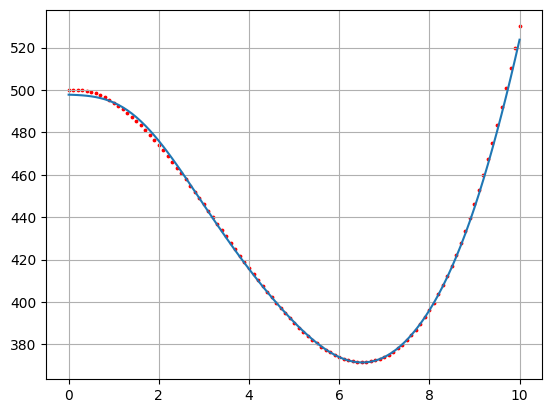

In [7]:
# L2 РЕГУЛЯРИЗАЦИЯ ЧЕРЕЗ ВЫРАЖЕНИЕ ВЕСОВ

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 20

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка
Y = y_train  # обучающая выборка

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = Y @ X_train @ A
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)  # описание модели
plt.scatter(x, y, marker='o', s=3, c='red')  # изначальная выборка
plt.grid(True)
plt.show()

## Домашняя работа

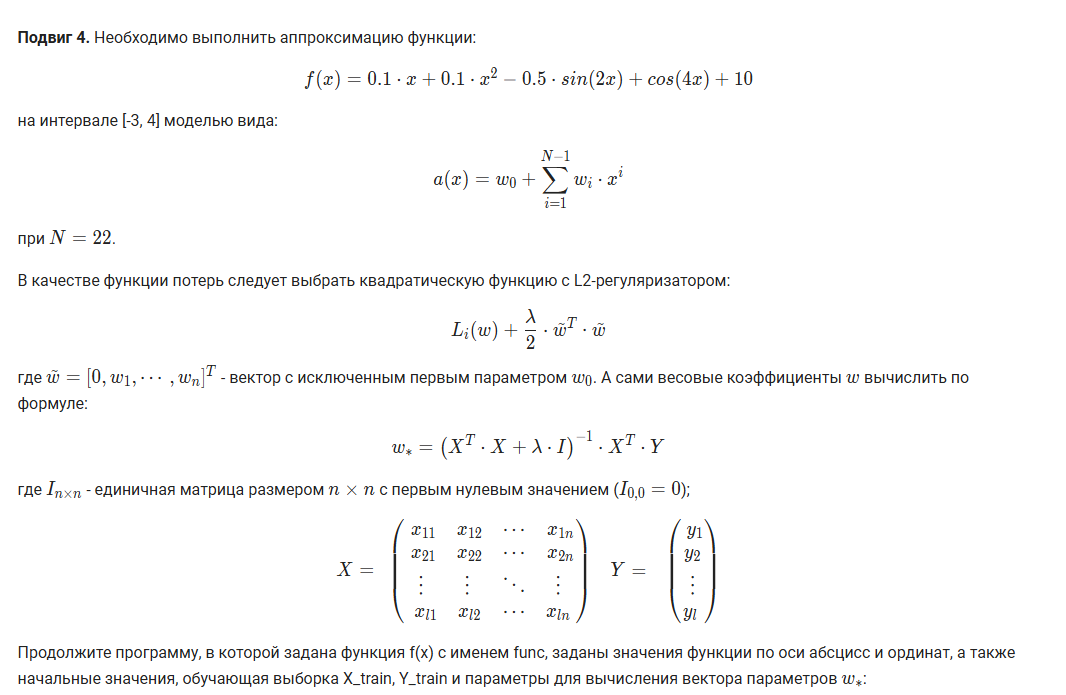
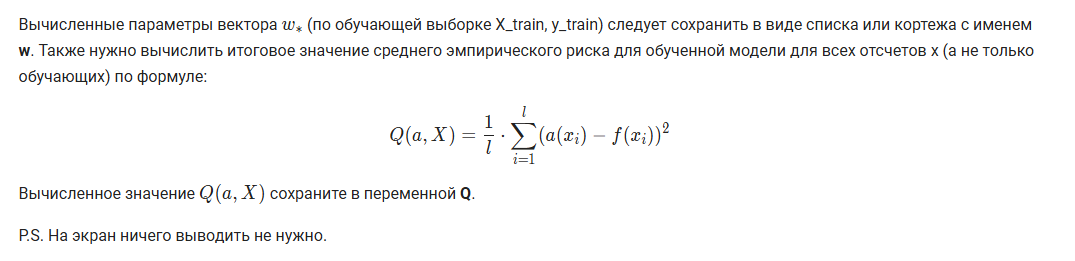

In [22]:
import numpy as np


def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10


x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20  # параметр лямбда для L2-регуляризатора

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = lm * np.eye(N)  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем

X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)

# здесь продолжайте программу

w = np.linalg.inv(X_train.T @ X_train + IL) @ X_train.T @ Y_train
Q = np.mean((w @ X.T - y) ** 2)
Q, w

(0.5864171633323036,
 array([ 8.74909364e+00,  2.62412904e-01,  5.04855009e-01, -1.82788372e-01,
         3.30365665e-03,  3.03242684e-02,  1.29780272e-01,  1.49481489e-02,
         6.83460364e-02, -1.55948856e-02, -9.61676619e-02,  1.15432169e-02,
         3.30860971e-02, -4.13387376e-03, -5.44346695e-03,  7.51910025e-04,
         4.79049416e-04, -7.28478615e-05, -2.17997035e-05,  3.60150961e-06,
         4.04612564e-07, -7.17033363e-08]))

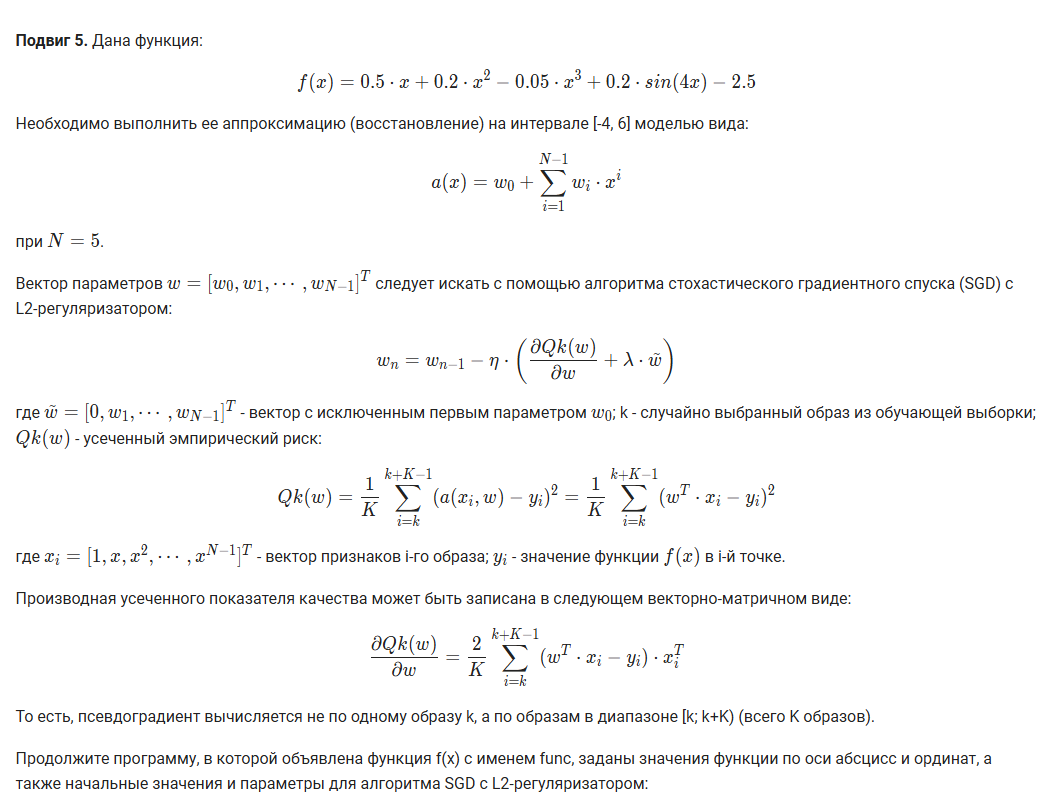
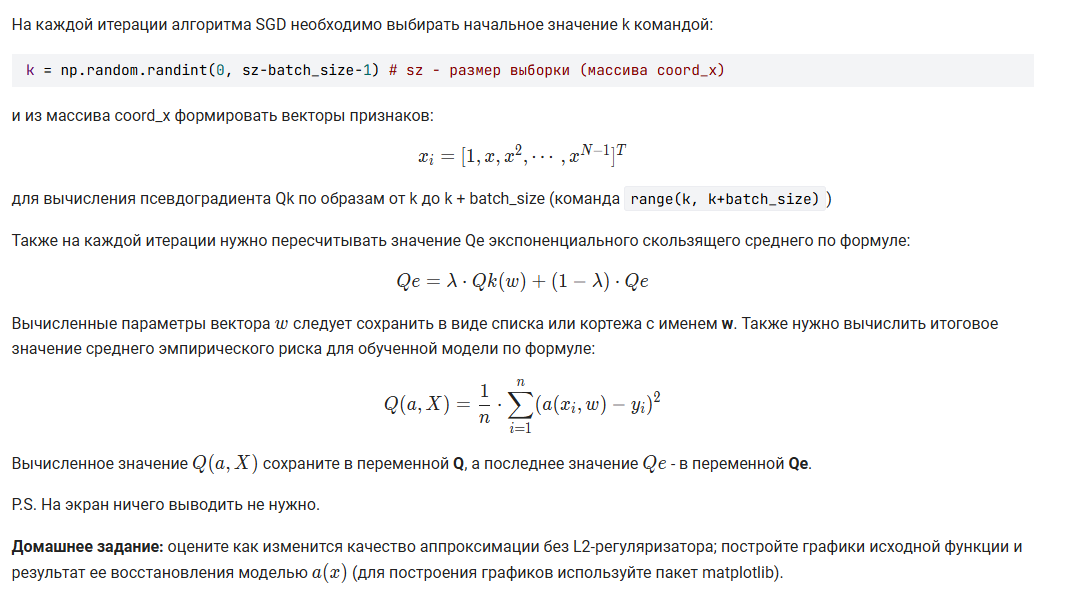

In [44]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# модель
def model(w, x):
    return w.T @ x

# функция потерь
def loss(w, x, y):
    return np.mean((model(w, x) - y) ** 2)


# производная функции потерь
def dL(w, x, y):
    return 2/batch_size * (model(w, x) - y) @ x.T


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 2 # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)

X = np.array([[x**i for i in range(N)] for x in coord_x])
Y = coord_y

Qe = loss(w, X.T, Y) # начальное значение среднего эмпирического рискsа
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(n_iter):
    k = np.random.randint(0, sz-batch_size-1)
    eps = loss(w, X[k:k+batch_size].T, Y[k:k+batch_size])
    Qe = lm * eps + (1 - lm) * Qe
    w = w - eta * (dL(w, X[k:k+batch_size].T, Y[k:k+batch_size]) + lm_l2 * np.concatenate(([0], w[1:])))

Q = loss(w, X.T, Y)
Q, Qe, w

(0.2892829896920562,
 0.41682772824346465,
 array([-2.43710903,  0.16673647,  0.19592597, -0.02461137, -0.00352843]))